In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
import string
import re
from better_profanity import profanity


In [2]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
reviews_df=pd.DataFrame()

In [17]:
train1 = pd.read_csv('/content/train1.csv')
train2 = pd.read_csv('/content/train2.csv')
train3 = pd.read_csv('/content/train3.csv')

reviews_df = pd.concat([train1, train2, train3], ignore_index=True)

print(reviews_df.head())

                                                Text  y
0  explanation why the edits made under my userna...  0
1  daww he matches this background colour i am se...  0
2  hey man i am really not trying to edit war it ...  0
3   more i can not make any real suggestions on i...  0
4  you sir are my hero any chance you remember wh...  0


In [18]:
len(reviews_df)

163571

In [19]:
reviews_df['y'].value_counts()

y
0    146245
1     17326
Name: count, dtype: int64

In [20]:
stopwords_set = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Define contraction patterns
    cont_patterns = [
        ('(W|w)on\'t', 'will not'),
        ('(C|c)an\'t', 'can not'),
        ('(I|i)\'m', 'i am'),
        ('(A|a)in\'t', 'is not'),
        ('(\w+)\'ll', '\g<1> will'),
        ('(\w+)n\'t', '\g<1> not'),
        ('(\w+)\'ve', '\g<1> have'),
        ('(\w+)\'s', '\g<1> is'),
        ('(\w+)\'re', '\g<1> are'),
        ('(\w+)\'d', '\g<1> would'),
    ]

    # Remove contractions
    patterns = [(re.compile(regex), repl) for regex, repl in cont_patterns]
    for pattern, repl in patterns:
        text = re.sub(pattern, repl, text)

    # Remove URLs
    text = re.sub(r"http\S+", "", text)

    # Remove non-alphanumeric characters
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set]

    # Join the tokens back into a single string
    processed_text = ' '.join(filtered_tokens)

    return processed_text

In [21]:
first_row_processed_text = preprocess_text(reviews_df['Text'][0])

print("Original Text:")
print(reviews_df['Text'][0])
print("\nProcessed Text:")
print(first_row_processed_text)


Original Text:
explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now

Processed Text:
explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired


In [22]:
# Filter rows where the 'Text' column contains float values
float_reviews = reviews_df[reviews_df['Text'].apply(lambda x: isinstance(x, float))]

print(float_reviews)

       Text  y
4482    NaN  0
6300    NaN  0
17311   NaN  0
52442   NaN  0
53787   NaN  0
61758   NaN  0
82681   NaN  0
160781  NaN  0


In [23]:
non_string_values = reviews_df[~reviews_df['Text'].apply(lambda x: isinstance(x, str))]

unique_data_types = non_string_values['Text'].apply(type).unique()

print("Unique data types present in the 'Text' column other than string:")

for data_type in unique_data_types:
    print(data_type)


Unique data types present in the 'Text' column other than string:
<class 'float'>


In [24]:
# Removing rows with NaN values
reviews_df = reviews_df.dropna(subset=['Text'])

In [25]:
len(reviews_df)

163563

In [26]:
reviews_df['clean_reviews'] = reviews_df['Text'].apply(preprocess_text)

In [27]:
reviews_df['clean_reviews'].head()

0    explanation edits made username hardcore metal...
1    daww match background colour seemingly stuck t...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
Name: clean_reviews, dtype: object

In [ ]:
reviews_df.to_csv('/content/reviews_processed.csv',index=False)

In [28]:
#Extracting Trigrams
def extract_trigrams(text):
    tokens = word_tokenize(text)
    trigrams = list(ngrams(tokens, 3))
    return trigrams

In [30]:
reviews_df['trigrams'] = reviews_df['clean_reviews'].apply(extract_trigrams)

In [31]:
# Counting Frequency
all_trigrams = [trigram for review in reviews_df['trigrams'] for trigram in review]

trigram_freq = Counter(all_trigrams)

In [36]:
# 10 Most Common Trigrams
print("10 Most Common Trigrams:")
for trigram, freq in trigram_freq.most_common(10):
    print(f"{trigram}: {freq}")

10 Most Common Trigrams:
('nigger', 'nigger', 'nigger'): 2009
('fuck', 'fuck', 'fuck'): 1694
('hi', 'moron', 'hi'): 1468
('moron', 'hi', 'moron'): 1466
('criterion', 'speedy', 'deletion'): 1441
('article', 'talk', 'page'): 1439
('faggot', 'faggot', 'faggot'): 1372
('lol', 'lol', 'lol'): 1273
('pig', 'pig', 'pig'): 1248
('fat', 'jew', 'fat'): 1226


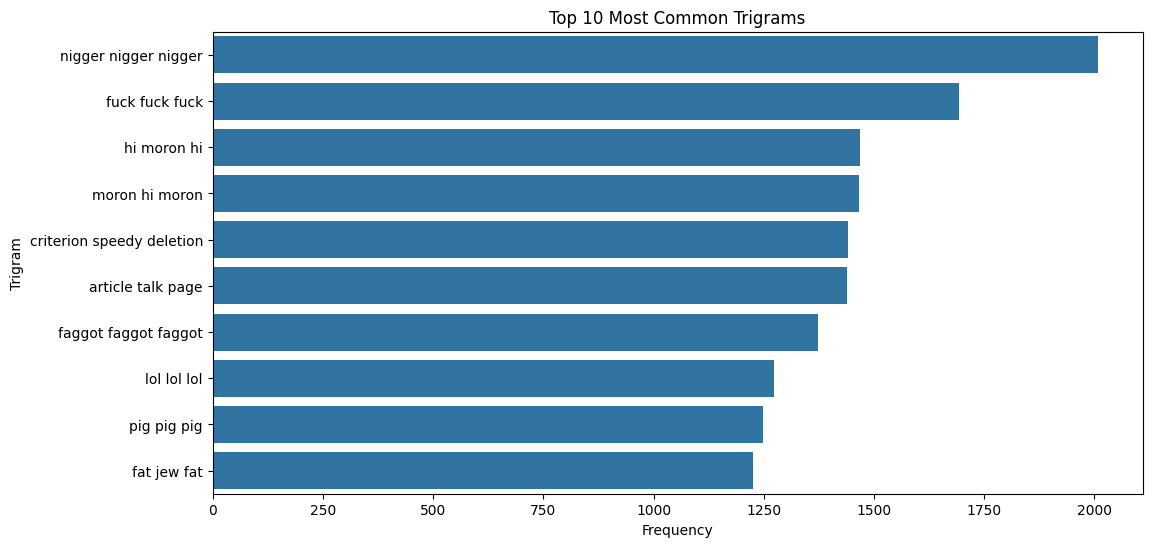

In [38]:
# Plotting the 10 most common trigrams
trigram_df = pd.DataFrame(trigram_freq.most_common(10), columns=['Trigram', 'Frequency'])
trigram_df['Trigram'] = trigram_df['Trigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Trigram', data=trigram_df)
plt.title('Top 10 Most Common Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()